In [1]:
import os, warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN


cust = pd.read_csv('Mall_Customers.csv', sep=',')
cust.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"}, inplace=True)
print("Veri setinde {:,}  gözlem ve {} kolon bulunmaktadır.".format(cust.shape[0], cust.shape[1]))
print("Verilerde {} eksik değer var.".format(cust.isna().sum().sum()))
cust.head()

Veri setinde 200  gözlem ve 5 kolon bulunmaktadır.
Verilerde 0 eksik değer var.


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
cust.drop('CustomerID', axis=1, inplace=True)
pd.DataFrame(cust.describe()).style.set_caption("Sayısal Değişkenlerin Özet İstatistikleri")

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [3]:
cust['Gender'] = ['Women' if i == 'Female' else 'Men' for i in cust.Gender]
pd.DataFrame(cust.select_dtypes('object').describe().T).style.set_caption("Summary Statistics of Categorical Variables")

,count,unique,top,freq
Gender,200,2,Women,112


In [11]:
init_notebook_mode(connected=True)
plot_df=cust.copy()
plot_df['Annual Income']=plot_df['Annual Income'].mul(1000)
p1=plot_df.groupby('Gender')['Age'].mean().round(0).astype(int).reset_index()
p2=plot_df.groupby('Gender')['Annual Income'].mean().reset_index()
p3=plot_df.groupby('Gender')['Spending Score'].mean().round(0).astype(int).reset_index()

temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))
fig = make_subplots(rows=3, cols=2,
                    subplot_titles=("Yaşın Cinsiyete Göre Dağılımı", 
                                    "Müşterilerin Ortalama Yaşı",
                                    "Cinsiyete Göre Gelir Dağılımı", 
                                    "Müşteriler Ortalama Gelir",
                                    "Harcamaların Cinsiyete Göre Dağılımı", 
                                    "Müşterilerin Ortalama Harcaması")
                   )

fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Men']['Age'], histnorm='probability density', 
                           marker=dict(color='#508B8D',opacity=0.7, line=dict(width=1, color='#000000')), 
                           nbinsx=20, name="Men"),
              row=1, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Women']['Age'], histnorm='probability density', 
                           marker=dict(color='#F3D6CB',opacity=0.7, line=dict(width=1, color='#000000')),
                           nbinsx=20, name="Women"),
              row=1, col=1)

fig.add_trace(go.Bar(x=p1['Gender'], y=p1['Age'], text=p1['Age'], texttemplate='%{text} years', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8),width=.8,
                     hovertemplate='Average Age Among %{x} = %{y} years<extra></extra>', showlegend=False),
              row=1, col=2)

fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Men']['Annual Income'], histnorm='probability density', 
                           marker=dict(color='#508B8D', line=dict(width=1, color='#000000')), 
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Women']['Annual Income'], histnorm='probability density', 
                           marker=dict(color='#F3D6CB', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=2, col=1)
fig.add_trace(go.Bar(x=p2['Gender'], y=p2['Annual Income'], text=p2['Annual Income'], 
                     texttemplate='$%{text:,.0f}', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8),width=.8,
                     hovertemplate='Average Income Among %{x} = $%{y}<extra></extra>', showlegend=False),
              row=2, col=2)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Men']['Spending Score'], histnorm='probability density', 
                           marker=dict(color='#508B8D', line=dict(width=1, color='#000000')), 
                           opacity=0.7, name="Men", nbinsx=20, showlegend=False),
              row=3, col=1)
fig.add_trace(go.Histogram(x=plot_df[plot_df.Gender=='Women']['Spending Score'], histnorm='probability density', 
                           marker=dict(color='#F3D6CB', line=dict(width=1, color='#000000')),
                           opacity=0.7, name="Women", nbinsx=20, showlegend=False),
              row=3, col=1)
fig.add_trace(go.Bar(x=p3['Gender'], y=p3['Spending Score'], text=p3['Spending Score'], 
                     texttemplate='%{text}', textposition='outside',
                     marker=dict(color=['#508B8D', '#F0CABD'], opacity=0.8),width=.8,
                     hovertemplate='Average Spending Score Among %{x} = %{y}<extra></extra>', showlegend=False),
              row=3, col=2)
fig.update_traces(marker=dict(line=dict(width=1, color='#000000')))
fig.update_layout(template=temp,barmode='overlay', height=1500, width=700,
                  legend=dict(orientation="h", yanchor="bottom", xanchor="right", y=1.03, x=.97),
                  xaxis1_title="Yaş", yaxis1_title='Olasılık Yoğunluğu', 
                  xaxis2_title="Cinsiyet", yaxis2_title="Age", yaxis2_range=[0,45],
                  xaxis3_title="Yıllık Gelir, $", yaxis3_title='Olasılık Yoğunluğu', 
                  xaxis4_title="Cinsiyet", yaxis4_title="Yıllık Gelir, $", yaxis4_range=[0,69e3],
                  xaxis5_title="Harcama Puanı", yaxis5_title='Olasılık Yoğunluğu', 
                  xaxis6_title="Cinsiyet", yaxis6_title="Harcama Puanı", yaxis6_range=[0,59]
                 )
fig.show()

# Pairplots
fig = ff.create_scatterplotmatrix(cust, diag='box', index='Gender', colormap=['#508B8D', '#F0CABD']) 
fig.update_traces(marker=dict(size=9, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(title="Alışveriş Merkezi Müşteri Çifti Grafikleri", template=temp, 
                  legend=dict(orientation="h", yanchor="bottom", y=1.02, x=.35),
                  height=900, width=700)
fig.show()

# Correlations
corr=cust.corr()
x = corr.columns.tolist() 
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='mint', 
                                  reversescale=True, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(template=temp, title="AVM Müşteri İlişkileri", yaxis_tickangle=-30)
fig.show()

# K-Means Clustering

In [5]:
# K-Means Clustering
clust_df = cust.copy()
clust_df['Gender'] = [1 if i == "Women" else 0 for i in clust_df.Gender]

k_means = list()
for clust in range(1,16):
    km = KMeans(n_clusters=clust, init='k-means++', random_state=21).fit(clust_df)
    k_means.append(pd.Series({'Clusters': clust, 
                              'Inertia': km.inertia_,
                              'model': km}))

# Plot results
plot_km = (pd.concat(k_means, axis=1).T
           [['Clusters','Inertia']]
           .set_index('Clusters'))

fig = px.line(plot_km, x=plot_km.index, y='Inertia', markers=True)
fig.add_vline(x=5, line_width=3, line_dash="dash", line_color="darkgrey")
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=.31,
    y=75e3,
    text="Optimal Küme Sayısı",
    axref="x domain",
    ayref="y",
    ax=.43,
    ay=12e4,
    arrowhead=2, 
    bordercolor="#585858",
    borderpad=4, 
    bgcolor='white',
    font=dict(size=14)
)
fig.update_traces(line_color='#518C89')
fig.update_layout(template=temp, title="K-Means Kümeleme Dirsek Eğrisi", 
                  xaxis=dict(tickmode = 'linear', showline=True), yaxis=dict(showline=True), width=700)
fig.show()

In [6]:

km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(clust_df)
plot_km=clust_df.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="Spending Score", y="Annual Income", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Küme Profilleri,<br>Müşteri Harcamaları ve Gelir", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Spending Score', showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $', ticksuffix='k', showline=True))
fig.show()

# Hierarchical Clustering

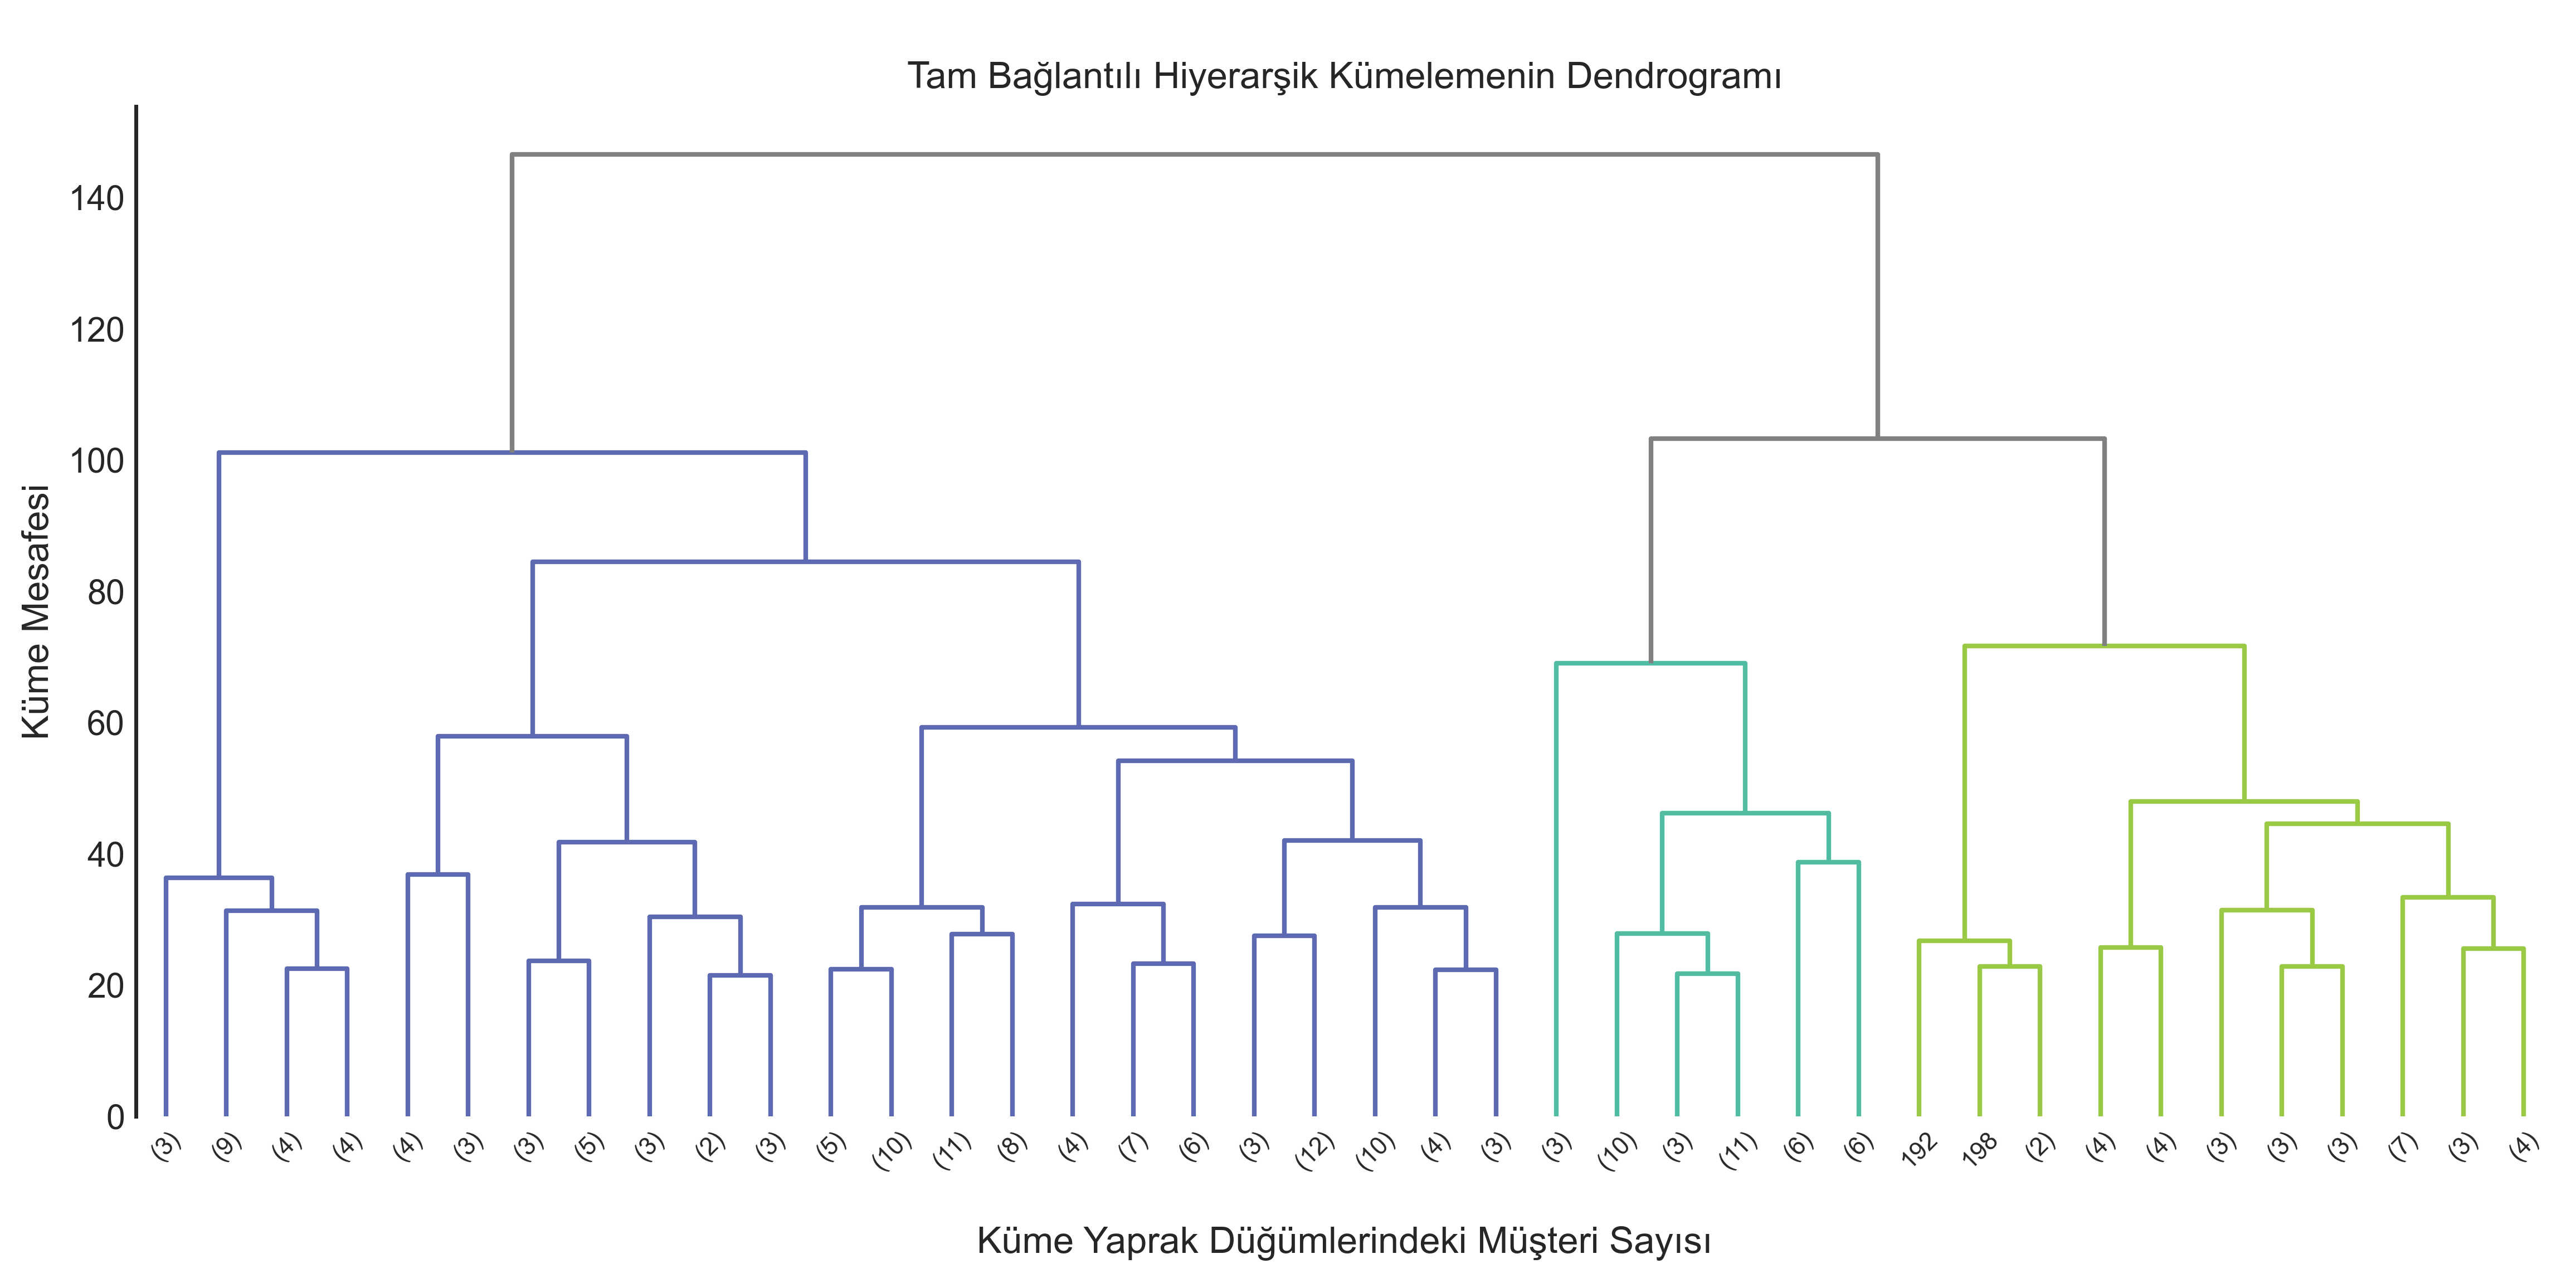

In [7]:
sns.set(rc={'figure.dpi':400})
sns.set_context('notebook')
sns.set_style('ticks')

Z = hierarchy.linkage(clust_df, method='complete', metric='euclidean')
fig, ax = plt.subplots(figsize=(14,6))
hierarchy.set_link_color_palette(['#5d69b1', '#52bca3', '#99c945'])
den = hierarchy.dendrogram(Z, orientation='top', color_threshold=102,
                           p=40, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='grey')
#ax.axhline(101, color='grey', linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel('\nKüme Yaprak Düğümlerindeki Müşteri Sayısı')
ax.set_ylabel('Küme Mesafesi')
ax.set_title('\nTam Bağlantılı Hiyerarşik Kümelemenin Dendrogramı')
fig.show()

In [8]:
# Hierarchical clustering
hc = AgglomerativeClustering(3, affinity='euclidean', linkage='complete', compute_full_tree=False)
hc_pred = hc.fit_predict(clust_df)
plot_hc=clust_df.copy()
plot_hc["Hierarchical Cluster"]=hc_pred
plot_hc=plot_hc.sort_values(by='Hierarchical Cluster')
plot_hc['Hierarchical Cluster'] = plot_hc['Hierarchical Cluster'].astype(str)

# Plot of clusters                                               
fig = px.scatter(plot_hc, x="Spending Score", y="Annual Income", color="Hierarchical Cluster",
                 color_discrete_sequence=px.colors.qualitative.Vivid[1:])
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="Hiyerarşik Küme Profilleri,<br>Müşteri Harcamaları ve Gelir", 
                  width=700, legend_title = 'Cluster',
                  xaxis=dict(title='Spending Score',showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $',ticksuffix='k',showline=True))
fig.show()

# DBSCAN

In [9]:
db=DBSCAN(eps=15, min_samples=11, metric='euclidean')  #17,15 14,7 12 7 115
db_preds=db.fit_predict(clust_df)
plot_db=clust_df.copy()
plot_db['DB Cluster'] = db_preds
plot_db=plot_db.sort_values(by='DB Cluster')
plot_db['DB Cluster'] = plot_db['DB Cluster'].astype(str).apply(lambda x: 'Outliers' if x == '-1' else x)


# Plot of clusters   
fig = px.scatter(plot_db, x="Spending Score", y="Annual Income", color="DB Cluster",
                 color_discrete_sequence=px.colors.qualitative.T10[2:])
fig.update_traces(marker=dict(size=11, opacity=0.85, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="DBSCAN Cluster Profiles,<br>Customer Spending vs. Income", 
                  width=700, legend_title = 'Cluster',
                  xaxis=dict(title='Spending Score',showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $',ticksuffix='k',showline=True))
fig.show()

# Cluster Karşılaştırması


In [10]:
# Initializing figure with 3 3D subplots
fig = make_subplots(rows=3, cols=1,
                    vertical_spacing=0.1,
                    specs=[[{'type': 'scatter3d'}],
                           [{'type': 'scatter3d'}], 
                           [{'type': 'scatter3d'}]],
                     subplot_titles=("K-Means Clustering with 5 clusters", 
                                     "Hierarchical Clustering<br>with 3 clusters", 
                                     "DBSCAN<br>with 4 clusters")
                   )

# Adding clusters to scatterplots 
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(int)
plot_km=plot_km.sort_values(by='K-Means Cluster')
for i in range(0,5):
    fig.add_trace(go.Scatter3d(x = plot_km[plot_km['K-Means Cluster'] == i]['Spending Score'],
                               y = plot_km[plot_km['K-Means Cluster'] == i]['Age'],
                               z = plot_km[plot_km['K-Means Cluster'] == i]['Annual Income'],                        
                               mode = 'markers', marker=dict(
                                   size=7,  
                                   color = px.colors.qualitative.Prism[i],
                                   line_width = 1,
                                   line_color='#F7F7F7',
                                   opacity=0.7),
                               name = str('Cluster '+str(i)), legendgroup = 1),
                 row=1, col=1)

plot_hc['Hierarchical Cluster'] = plot_hc['Hierarchical Cluster'].astype(int)
plot_hc=plot_hc.sort_values(by='Hierarchical Cluster')
for i in range(0,3):    
    fig.add_trace(go.Scatter3d(x = plot_hc[plot_hc['Hierarchical Cluster'] == i]['Spending Score'],
                               y = plot_hc[plot_hc['Hierarchical Cluster'] == i]['Age'],
                               z = plot_hc[plot_hc['Hierarchical Cluster'] == i]['Annual Income'],                        
                               mode = 'markers', marker=dict(
                                   size=7,   
                                   color = px.colors.qualitative.Vivid[i+1],
                                   line_width = 1, 
                                   line_color='#F7F7F7',
                                   opacity=0.7),
                               name = str('Hierarchical Cluster '+str(i)), legendgroup = 2), 
                  row=2, col=1)

for i, j in enumerate(plot_db['DB Cluster'].unique()): 
    fig.add_trace(go.Scatter3d(x = plot_db[plot_db['DB Cluster'] == j]['Spending Score'],
                               y = plot_db[plot_db['DB Cluster'] == j]['Age'],
                               z = plot_db[plot_db['DB Cluster'] == j]['Annual Income'], 
                               mode = 'markers', marker=dict(
                                   size=7,   
                                   color = px.colors.qualitative.T10[i+2],
                                   line_width = 1,
                                   line_color='#F7F7F7',
                                   opacity=0.8),
                               name = str('DB Cluster '+str(j)), legendgroup = 3), 
                  row=3, col=1)

fig.update_traces(hovertemplate='Customer Spending Score: %{x}<br>Income: $%{z}<br>Age: %{y}')
fig.update_layout(title="Customer Segments based on Income, Spending, and Age",
                  template=temp, height=1800, legend_tracegroupgap = 500,
                  scene=dict(aspectmode='cube',
                             xaxis = dict(title='Spending Score', 
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='Age, in years',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='Income, $', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")), 
                  scene2=dict(aspectmode='cube', 
                             xaxis = dict(title='Spending Score',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='Age, in years',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='Income, $', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white")), 
                  scene3=dict(aspectmode='cube', 
                             xaxis = dict(title='Spending Score',
                                          backgroundcolor="#F3F3F3",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white",),
                             yaxis = dict(title='Age, in years',
                                          backgroundcolor="#E4E4E4",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"),
                             zaxis = dict(title='Income, $', 
                                          ticksuffix='k',
                                          backgroundcolor="#F6F6F6",
                                          gridcolor="white",
                                          showbackground=True,
                                          zerolinecolor="white"))
                  )
fig.show()